# TME 7 : Mini-projet Detection de motifs


## Recheche de pattern (motifs) en utilisant les suffix trees

Nous allons utiliser l'algorithme suffix-tree pour la recherche rapide et éfficace de motifs. Un suffix-tree est construit à partir d'un jeux de séquences, ensuite nous pouvons rechercher le motif en temps O(k) où k est la longueur du motif.

1\. Nous allons réutiliser les fonctions du TME6 pour générer ``t`` séquences artificielles de taille ``n``, et implanter dans chaque séquence un motif de taille ``k`` à des positions aléatoires avec ``v`` substitutions choisies aléatoirement. Cependant, les ``t`` séquences artificielles initiales (sans implantation) ainsi que le motif initial (sans variation/mutation) doivent être générées une seule fois. Ensuite, selon chaque question, nous introduisons des différentes variation au motif initial et les implantons dans les séquences initiales afin de générer des nouveau jeux de données. 

In [69]:
import random
import numpy as np

nuc = ('A', 'C', 'G', 'T')

k=5 #taille de motif
v=0 #nb de positions variables dans le motif
t=50 #nb de sequences
n=100 #longuer des sequence

def generateRandomSequence ( n, maj ):
    seq = ""
    for i in range ( n ):  
        seq += nuc [ random.randint ( 0, 3 ) ]
    if not ( maj ):
        seq = seq.lower()
    return seq


def generateRandomSequences(n, t):
    sequences = []
    for i in range ( t ):
        sequences.append ( generateRandomSequence ( n, True ) )
    return sequences

def replaceSeq ( sequence, v ):
    sequence = list ( sequence )
    for i in range ( v ):
        pos = random.randint ( 0, len ( sequence ) - 1 )
        nucleo = sequence [ pos ]
        while sequence [ pos ] == nucleo:
            sequence [ pos ] = random.choice ( nuc ) 
    return "".join ( sequence )

def implantMotifVar(k, v, t, n):
    motif = generateRandomSequence ( k, True )
    sequences = generateRandomSequences ( n, t )
    cpt = 0
    for seq in sequences:
        pos = random.randint ( 0, len ( seq ) - k )
        sub = replaceSeq ( motif, v )
        seq = seq [ 0 : pos ] + sub + seq [ len ( sub ) + pos : ]
        sequences [ cpt ] = seq
        cpt += 1
    return (sequences, motif)


1.1\. Generer les séquences artificielles initiales et implanter un motif (sans variation, v=0)

In [70]:
sequences, fix_motif = implantMotifVar ( k, 0, t, n )
print ( fix_motif )

CGATC


2\. Définissez une fonction ``construct_tree`` pour construire un suffix tree à partir des séquences artificielles (après implantation) en utilisant le python package suffix-trees trouvable ici: https://pypi.org/project/suffix-trees/. Tester si votre fonction est capable de trouver le motif sans variation implanté.

In [71]:
from suffix_trees import STree

st = STree.STree("abcdefghab")
print(st.find("abc")) # 0
print(st.find_all("ab")) # [0, 8]

def construct_tree(sequences):
    st = STree.STree ( "".join ( sequences ) )
    return st

tree = construct_tree(sequences)
print(tree.find_all(fix_motif))

0
{0, 8}
{1670, 2310, 2958, 3983, 4240, 2705, 3602, 272, 2452, 2072, 26, 160, 2849, 1445, 1318, 166, 3366, 1964, 3763, 1717, 4406, 695, 3513, 4665, 700, 3005, 958, 4284, 3263, 2116, 4040, 2761, 2504, 4683, 1867, 3407, 2131, 1749, 1240, 472, 4190, 1118, 3169, 4834, 1890, 869, 4582, 4967, 2283, 1516, 4718, 2677, 374, 4345, 506, 1019, 3838}


3\. Avant de chercher les motifs, implémentez ou reutilisez les fonctions pour générer tous les motifs (k-mer) possibles de taille k, en éliminant les motifs peu complexe pour éviter les calculs inutiles.

In [93]:
from itertools import product

def removeLowComplexe(motifs, minrep):
    validMotif = []
    for motif in motifs:
        if motif.count ( 'A' ) >= minrep:
            continue
        if motif.count ( 'T' ) >= minrep:
            continue
        if motif.count ( 'C' ) >= minrep:
            continue
        if motif.count ( 'G' ) >= minrep:
            continue
        validMotif.append ( motif )
    return validMotif

def removeLowComplexePair(motifs):
    validMotif = []
    for motif in motifs:
        rep = False
        for i in range ( len ( motif ) - 3 ):
            if motif [ i : i + 2 ] == motif [ i + 2 : i + 4 ]:
                rep = True
                break
        if not ( rep ):
            validMotif.append ( motif )
    return validMotif

def generateKmers(alphabet, k):
    validKmers = []
    res = []
    allkmers = product ( alphabet, repeat=k )
    for kmer in allkmers :
        validKmers.append ( kmer )
    validKmers = removeLowComplexe ( validKmers, (int) (k/2) + 1 )
    validKmers = removeLowComplexePair ( validKmers )
    for kmer in validKmers:
        res.append ( "".join ( kmer ) )
    return res

kmersValid = generateKmers(nuc, k)
#print ( kmersValid [0:100] )
#print ( len ( kmersValid ) )

552


4\. **Exact matching:** Définissez la fonction ``exact_match`` qui cherche dans le suffix tree tous les motifs possibles (k-mers), générés à la question precedent. La fonction renvoie un dictionnaire qui contient les motifs (keys) et leurs nombre d'occurrence (values). Ce dictionnaire doit être trié par nombre d'occurrences. 

Ensuite, trouvez et affichez les 10 motifs plus fréquents dans notre jeux de données artificiels.

In [94]:
from collections import OrderedDict

def exact_match(kmersV, stree):
    res = dict()
    for kmer in kmersV:
        res [ kmer ] = len ( stree.find_all ( kmer ) )
    return sorted ( res.items(), key=lambda x:-x[1] )

st = construct_tree(sequences)
motif_occur_sorted = exact_match(kmersValid, st)
print(list(motif_occur_sorted)[0:10])

[('TTCAA', 70), ('TATCA', 63), ('AATTG', 53), ('AGTAT', 53), ('ATCAT', 53), ('CAATT', 53), ('TTACA', 53), ('TCAAT', 52), ('AATGG', 50), ('ATTCA', 50)]


5\. Avez-vous réussi à trouver votre motif initial implanté en séquences? l'algorithme était-il rapide? Faites attention aux valeurs élevées des variable k, t, et n par rapport aux TMEs précedants. Quelle est la complexité de chaque recherche de motif? 

Le motif de départ n'a pas été trouvé car il était considéré comme "peu complexe" et ne faisait pas parti des k-mers générés (il contenait quatre A à la suite). L'algorithme était bien plus rapide que ceux précédemments vus. 
On a une complexité en O(k*taille(plus grand pattern)).

6\. Introduisez deux variation (v=2) au motif initial. Pour cela avant de chaque implantation, créez d'abord un motif varié (avec v substitutions choisies aléatoirement) à partir du motif initial et puis implantez-le dans une séquence. Repetez pour chaque sequence dans le Jeux de donnée. Il suffit de mettre ``v`` égal ``2`` et réutiliser les fonctions définies à la question 1.

In [95]:
v=2

sequences, fix_motif = implantMotifVar ( k, v, t, n )

#print(sequences)
print ( fix_motif )

GATGC


7\. Construisez le suffix tree à nouveau à partir des nouvelles séquences en utilisant le python package suffix-trees.

In [96]:
tree = construct_tree(sequences)
print(tree.find_all(fix_motif))

{477, 386, 4037, 550, 201, 138, 3019, 1516, 2768, 4786, 3508, 3862, 2553, 604, 2429}


8\. **Inexact matching:** 

Définissez fonction ``inexact_match`` qui cherche tous les motifs possibles (k-mers) générés à la question 2 dans le nouveau suffix tree donné (construit à partir des nouvelle séquences qui incluent le motif varié), et renvoie un dictionnaire qui contient les motifs (keys) et les listes de toutes leurs variations (values) ainsi que le meilleur motif variable. Il faut que vous utilisiez la algorithm *seed* pour trouver le motif variable. 

Ensuite, affichez le meilleur motif variable avec toutes son variation dans notre nouveaux jeux de données artificiels.

In [97]:
def hamdist(v, x):
    res = 0
    for i in range ( len ( v ) ):
        if v [ i ] != x [ i ]:
            res += 1
    return res

def inexact_match(kmersV, sequences, stree, v):
    sequence = "".join ( sequences )
    nb_graines = v + 1
    taille_graine = ( int ) ( k / nb_graines )
    j = 0
    candidats = dict()
    for kmerV in kmersV:
        for i in range ( nb_graines ):
            depart = i * taille_graine
            graine = kmerV [ depart : depart + taille_graine ]
            indices_candidats = stree.find_all ( graine )
            for indice in indices_candidats:
                seq_candidate = sequence [ indice - depart : indice + k - depart ]
                if len ( seq_candidate ) == k and hamdist ( kmerV, seq_candidate ) <= v:
                    if kmerV in candidats:
                        variations = candidats [ kmerV ] [ 0 ] + [ seq_candidate ] 
                        occurences = candidats [ kmerV ] [ 1 ] + 1
                        candidats [ kmerV ] = ( variations, occurences )
                    else:
                        candidats [ kmerV ] = ( [ seq_candidate ] , 1 )
    return dict ( sorted ( candidats.items(), key=lambda motif : -motif [ 1 ] [ 1 ] ) )     
        
st = construct_tree(sequences)
motif_occur_sorted_random = inexact_match(kmersValid, sequences, st, v)
print(list(motif_occur_sorted_random.items())[0:10])  

[('GATGC', (['GCTGC', 'GCTGA', 'GTTGA', 'GATCA', 'GATGA', 'GAAGA', 'GATAG', 'GATGT', 'GACAC', 'GGTCC', 'GATCA', 'GATTC', 'GTTAC', 'GAGAC', 'GTTGC', 'GAAGC', 'GTTGA', 'GAGGA', 'GTAGC', 'GCAGC', 'GATGC', 'GTTGC', 'GATGG', 'GGTGT', 'GGTAC', 'GCTGT', 'GAATC', 'GTTGT', 'GGTGG', 'GTGGC', 'GCGGC', 'GATCT', 'GCTGT', 'GAGGT', 'GACCC', 'GCGGC', 'GTTTC', 'GATGC', 'GTTGT', 'GCCGC', 'GTTTC', 'GAGGG', 'GGCGC', 'GTTGT', 'GAGGT', 'GATCA', 'GATCG', 'GATGA', 'GAACC', 'GACGA', 'GGTGT', 'GTGGC', 'GTTTC', 'GCTGA', 'GAGTC', 'GACGT', 'GCGGC', 'GATGG', 'GGTCC', 'GAGCC', 'GTTCC', 'GACCC', 'GACGG', 'GACGA', 'GATGG', 'GACGT', 'GTTGA', 'GAGGT', 'GAGGG', 'GGAGC', 'GTTGA', 'GATTG', 'GAGGT', 'GGTTC', 'GTCGC', 'GAGGC', 'GTTGT', 'GATGC', 'GATGC', 'GAAGT', 'GAATC', 'GAACC', 'GGTGG', 'GTGGC', 'GATGT', 'GCTGA', 'GAAGC', 'GATAG', 'GATCT', 'GAGCC', 'GATTG', 'GATTT', 'GATTT', 'GCTCC', 'GTTGA', 'GGTGC', 'GATAA', 'GATGC', 'GCTGT', 'GAACC', 'GAACC', 'GCGGC', 'GCGGC', 'GCTTC', 'GCAGC', 'GGTGA', 'GATGC', 'GGTGG', 'GACAC', 'GCTCC

In [98]:
#On affiche le motif le plus courant
print(list(motif_occur_sorted_random.items())[0][0])

GATGC


9\. Créez le motif logo à partir des séquences du meilleur motif variable que vouz venez de trouver. Vous pouvez utilizer ce site: https://weblogo.berkeley.edu/logo.cgi. Affichez votre logo ci-dessous.

Motif LOGO:

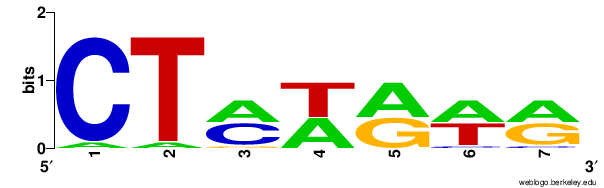

10\. Avez-vous réussi à trouver votre motif initial implanté en séquences? l'algorithme était-il rapide? Quelle est la complexité de chaque recherche de motif?

11\. Tester l'algorithme  suffix tree sur vos données de chipSeq. Puis générér le LOGO du motif trouvé

In [99]:
def readFasta(genome):
    sequence = []
    file = open(genome, "r")
    sequences = []
    seq = ""
    for s in file:
        if s[0] != ">":
            seq += s.strip().upper()
        else:
            sequences.append(seq)
            seq = ""
    return sequences[1:]
genome = "Sequence_by_Peaks_6.fasta" #votre fichier
sequences = readFasta(genome)
#print(sequences)

st = construct_tree(sequences)
motif_occur_sorted = inexact_match(kmersValid, sequences, st, v)
print(list(motif_occur_sorted.items())[0:10])  

[('AATTG', (['ATATG', 'AAGAG', 'AATCC', 'ATGTG', 'AACTC', 'ACTCG', 'AAATT', 'AATTA', 'AACAG', 'AGATG', 'ATATG', 'AATAT', 'ATATG', 'AAACG', 'AATGA', 'AAAAG', 'AACCG', 'AGGTG', 'AATTG', 'AGTTA', 'AGTTT', 'AAAGG', 'AAAAG', 'AAAGG', 'AGTTA', 'AACCG', 'AAGTT', 'AGTTC', 'AATAA', 'AAGAG', 'AATAC', 'AGTTT', 'AATCG', 'AATAA', 'AACTG', 'ACTGG', 'AACTC', 'AACTC', 'AATGC', 'AATGT', 'AAAAG', 'AAATG', 'AATGT', 'ATTAG', 'ATTAG', 'ATTAG', 'ACATG', 'ATTGG', 'AATTT', 'ATTTA', 'ATTAG', 'AAATG', 'AATGA', 'AATAT', 'AACAG', 'AATCC', 'AAATC', 'AATCC', 'AAACG', 'AATAC', 'AGATG', 'AATAA', 'ACTTC', 'AACTG', 'AGATG', 'AAATT', 'AATTC', 'ACTTG', 'AACTG', 'ACTGG', 'ACTTC', 'AAGAG', 'AACGG', 'AAACG', 'AATTA', 'AAGAG', 'AAGAG', 'AAAAG', 'AACTA', 'AATGT', 'AACTA', 'AATGC', 'ACCTG', 'ATATG', 'AAATG', 'AATGA', 'AAATG', 'AATGC', 'ATTGG', 'AAATG', 'AATGT', 'ATCTG', 'AAATT', 'AATTT', 'ATTTG', 'ATTTT', 'AATGG', 'AAAGG', 'AAAAG', 'AAGTA', 'AAATG', 'AATGA', 'AATTG', 'AGCTG', 'ATTGG', 'ACTTA', 'AAGAG', 'AAATA', 'AATAT', 'AAGAG

In [101]:
#On trouve le motif suivant qui semble intéressant:

print(list(motif_occur_sorted.items())[0][0])

#En effet, si l'on considère la partie TCAAC, en supposant qu'il y a eu deux 
#variations, on s'approche du motif CCAAT trouvé aux tme précédents.

AATTG


12\. Créez le motif logo à partir des séquences du meilleur motif variable que vouz venez de trouver. Vous pouvez utilizer ce site: https://weblogo.berkeley.edu/logo.cgi. Affichez votre logo ci-dessous.
